In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
library('ggplot2')

In [3]:
plot <- ggplot(data = iris, aes(x = Petal.Width, y= Petal.Length)) +
geom_point() + geom_smooth(method =  'lm') +
theme_bw(base_size =  14)

`geom_smooth()` using formula = 'y ~ x'


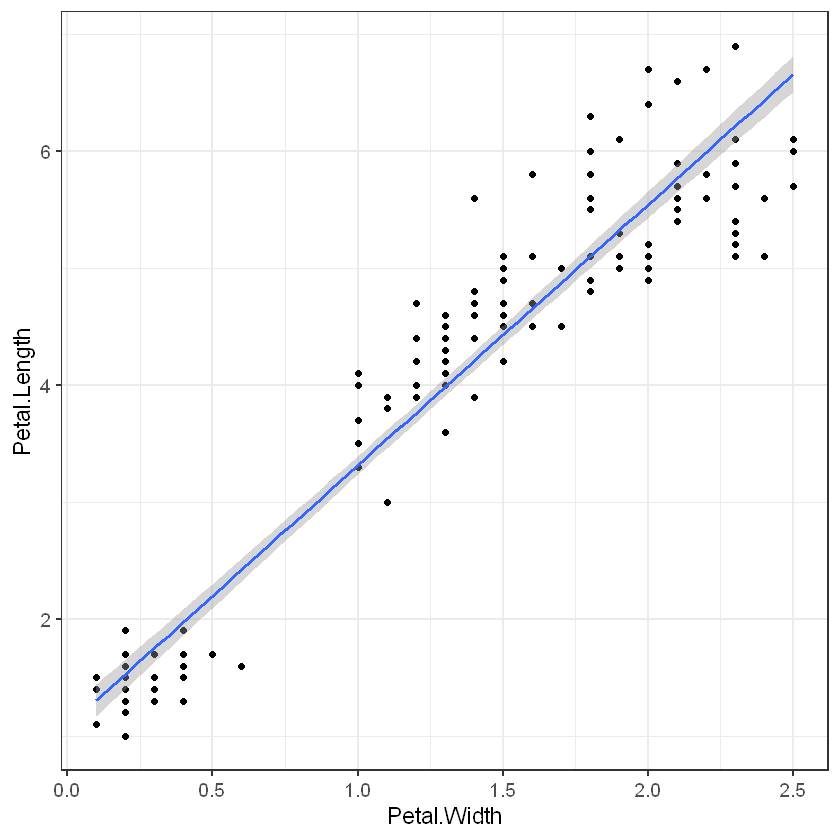

In [4]:
plot

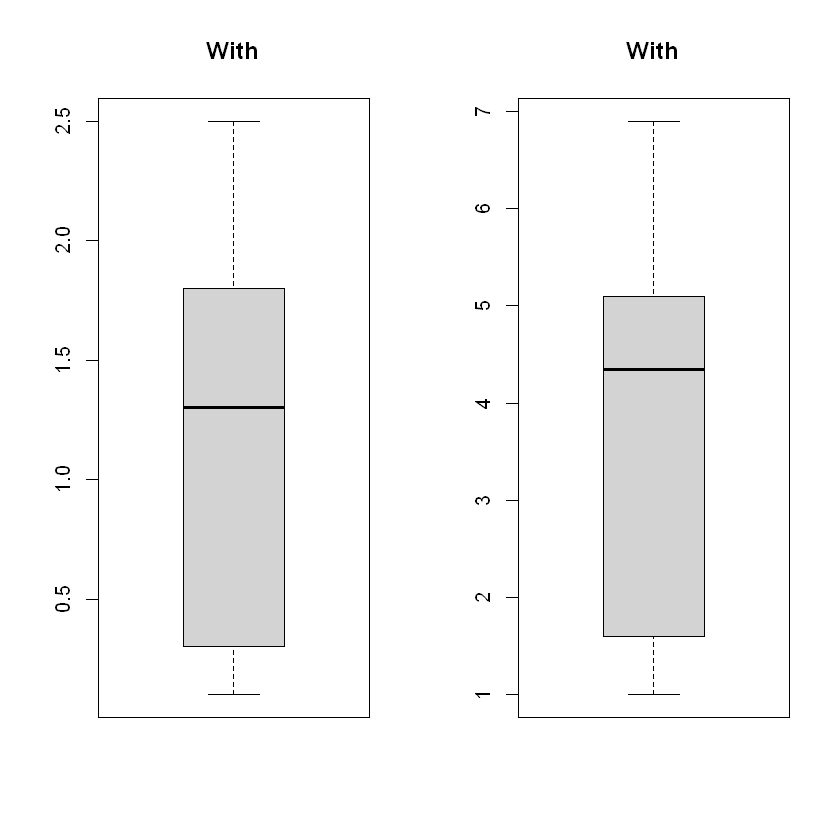

In [5]:
par(mfrow = c(1,2))
boxplot(iris$Petal.Width, main = 'With')
boxplot(iris$Petal.Length, main = 'With')


In [7]:
boxplot.stats(iris$Petal.Width)$out
# no outlier

numeric(0)

In [8]:
boxplot.stats(iris$Petal.Length)$out
# no outlier

numeric(0)

In [6]:
print(cor(iris$Petal.Width, iris$Petal.Length))

[1] 0.9628654


In [9]:
set.seed(42)

In [10]:
trainingRowIndex <- sample(1:nrow(iris),  0.7*nrow(iris))
trainingData <- iris[trainingRowIndex,]
testData <- iris[-trainingRowIndex,]
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

In [11]:
lmMod <- lm(Petal.Length ~ Petal.Width, data =trainingData)
iPred <- predict(lmMod, testData)

In [13]:
mse = mean(lmMod$residuals^2)
print(paste("mse: ", mse))

[1] "mse:  0.229979417628902"


In [14]:
mse_test = mean((testData$Petal.Length - iPred)^2)
print(paste('mse in test: ', mse_test))

[1] "mse in test:  0.217171445068203"


In [15]:
print(summary(lmMod))


Call:
lm(formula = Petal.Length ~ Petal.Width, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3496 -0.2976  0.0076  0.2329  1.4037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.04175    0.08562   12.17   <2e-16 ***
Petal.Width  2.25325    0.06243   36.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4842 on 103 degrees of freedom
Multiple R-squared:  0.9267,	Adjusted R-squared:  0.926 
F-statistic:  1303 on 1 and 103 DF,  p-value: < 2.2e-16



In [16]:
print(coef(lmMod))

(Intercept) Petal.Width 
   1.041753    2.253255 


In [20]:
beta_width = coef(lmMod)['Petal.Width']
print(paste("slope: ", beta_width))
Intercept <- coef(lmMod)["(Intercept)"]
print(paste("Intercept: ", Intercept))

[1] "slope:  2.25325489500747"
[1] "Intercept:  1.04175321056764"


In [21]:
x <- c(0.9, 1.5, 2.1)
y <- Intercept + beta_width * x
print("Solution 1 - result: ")
print(y)

y1  <- predict(lmMod, data.frame(Petal.Width = x))
print("Solution 1 - result: ")
print(y1)

[1] "Solution 1 - result: "
[1] 3.069683 4.421636 5.773588
[1] "Solution 1 - result: "
       1        2        3 
3.069683 4.421636 5.773588 


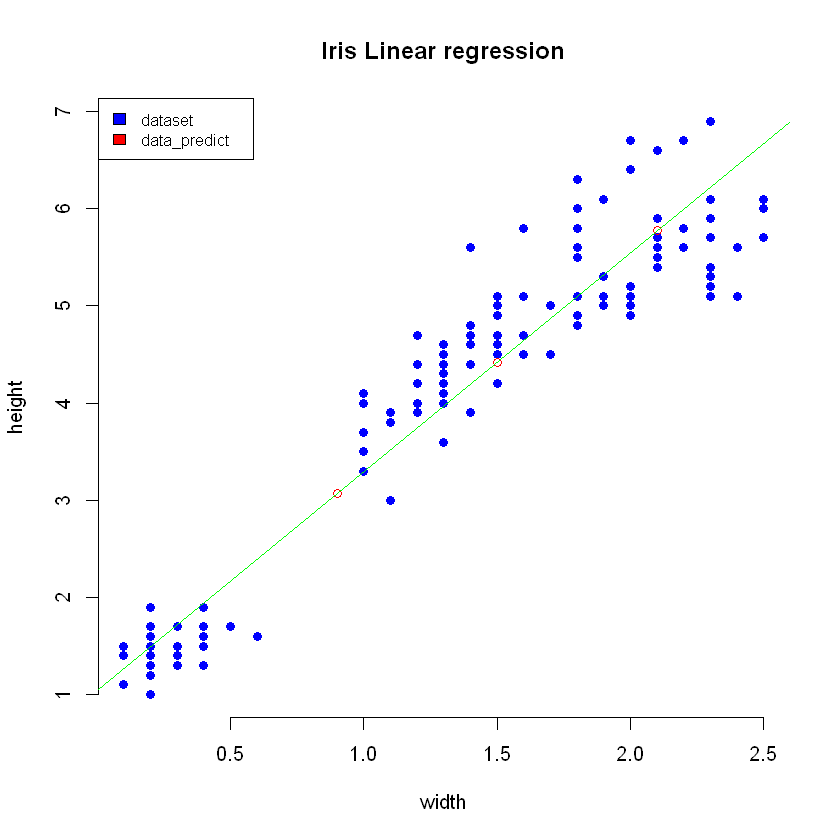

In [22]:
# Visualization
plot(iris$Petal.Width, iris$Petal.Length, 
     main = "Iris Linear regression",
     xlab = "width", ylab = "height",
     pch = 19, frame = FALSE, col= 'blue')
lines(x, y, col= 'red', type='p')
abline(lmMod, iris, col = "green")
legend("topleft", 
       c("dataset", "data_predict"), 
       cex=0.8, 
       fill = c("blue", "red"))

In [23]:
saveRDS(lmMod, 'lmMod.rds')

In [24]:
lmMod_load = readRDS('lmMod.rds')